# Обзор процесса анализа данных в статье "*Digitizing ECG image: new fully automated method and open-source software code*"

Статья: https://doi.org/10.1101/2021.07.13.21260461

Исходный код: https://github.com/Tereshchenkolab/paper-ecg

## Понимание бизнеса

В статье описывается разработанное авторами программное решение с открытым исходным кодом, предназначенное для перевода отсканированных записей ЭКГ в электронный формат.

Во введении ставится проблема обработки данных ЭКГ, полученных в те времена, когда не было распространено снятие показаний напрямую в электронном формате.

Принимается во внимание, что уже существуют инструменты для переведения ЭКГ в электронный формат. В качестве примера приводится программа ECGScan, распространяющаяся на коммерческой основе и требующая ручного выделения пользователем ключевых точек ЭКГ.

В качестве преимуществ разрабатываемого решения над аналогами приводятся открытый исходный код и снижение необходимости взаимодействия с пользователем.

## Понимание данных

Для разработки и валидации программного решения использовались данные ЭКГ университета Oregon Health & Science University.

Каждая запись ЭКГ была представлена в двух форматах:
* электронная запись ЭКГ
* бумажная запись ЭКГ

Данные представляют собой десятисекундные отрезки ЭКГ в 12 отведениях, полученные в состоянии покоя при помощи аппаратуры "MAC 5500 HD". Стандартные настройки вывода: скорость бумаги - 25 мм/с, амплитуда - 10 мм/мВ.

В целях этого исследования записи пациентов с мерцательной аритмией были исключены из набора данных.

Всего было отобрано 230 записей ЭКГ пациентов среднего возраста 30 (+-15) лет, 25% из которых были женщинами, а 52% имели сердечно-сосудистые заболевания.

## Подготовка данных

Первым делом изображение поворачивается вертикально (автоматически с возможностью коррекции пользователем). Алгоритм устойчив к небольшим поворотам изображения, но перестает работать, если оно развернуто сильно.

Поворот изображения реализован при помощи библиотеки OpenCV. Размер остается прежним, края обрезаются.

Затем пользователю предлагается выделить фрагменты изображения, содержащие отдельные отведения ЭКГ.

Для преобразования отсканированных записей ЭКГ в электронный формат необходимо получить сами значения сигнала и вычислить масштаб сетки, чтобы соотнести их с единицами измерения сигналов ЭКГ (мс).



![image.png](https://www.medrxiv.org/content/medrxiv/early/2021/07/16/2021.07.13.21260461/F2.large.jpg?width=800&height=600&carousel=1)

Изображение каждого выделенного фрагмента ЭКГ переводится в черно-белый формат при помощи функции $cvtColor()$ библиотеки OpenCV.

Строятся гистограммы белых пикселей по вертикали и горизонтали. При помощи библиотеки SciPy определяется период сетки.

Выделение сигнала производится путем пороговой обработки. В качестве начального порогового значения используется порог Otsu. Затем значение порога подбирается, пока не достигнет 60% либо пока период сетки не перестанет корректно определяться.

Для получения цифровых значений сигнала используется алгоритм динамического программирования, основанный на алгоритме Viterbi.

![image.png](https://www.medrxiv.org/content/medrxiv/early/2021/07/16/2021.07.13.21260461/F3.large.jpg?width=800&height=600&carousel=1)

## Моделирование

Из электронных записей ЭКГ, взятых непосредственно из базы данных был вычислен сердечный ритм. Были найдены и подтверждены двумя экспертами ключевые точки (при помощи алгоритма Pan-Tompkins), измерены традиционные для ЭКГ метрики (интервалы PR, QRS, QT, QTc), а также метрики VCG GEH.

Отсканированные записеи ЭКГ, переведенные в электронный формат, были откалиброваны к записям из БД. Для них были измерены соответствующие метрики.

Для анализа согласия двух видов ЭКГ использовался метод Блэнда-Алтмана, для сравнения средних значений и дисперсий использовался метод Bradley-Blackwood.

## Оценка

Для оценки алгоритма исходный датасет разделили на две части: 150 (65%) записей для разработки и 80 (35%) записей для валидации.

Точность определения традиционных показателей ЭКГ (интервалы PR, QRS, QT, QTc) на оцифрованных записях в сравнении с электронными составила 97.2%-99.1%, но метрика согласия для этих величин оказалась ниже 0.9, что является неудовлетворительным результатом.



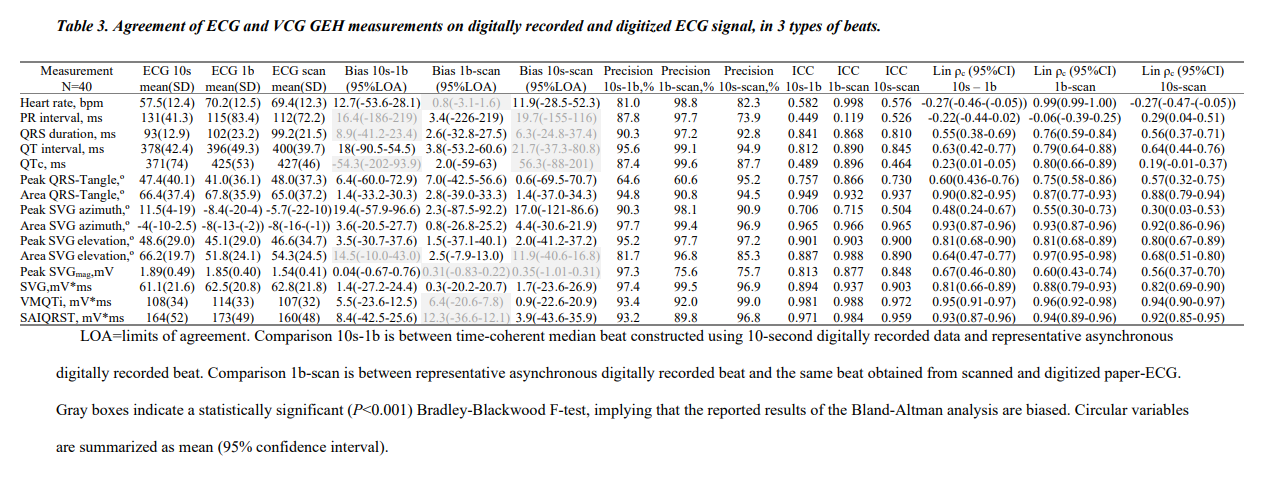

## Развертывание

Исходный код полученного инструмента доступен по [ссылке](https://github.com/Tereshchenkolab/paper-ecg).

Для разработки GUI использовался фреймворк PyQt5.